<a href="https://colab.research.google.com/github/sarindesai/notebooks/blob/main/Hierarchical_Clustering(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data=load_iris(as_frame=True)
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
data.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm=norm_func(data.frame.iloc[:,1:])

In [ ]:
df_norm

,sepal width (cm),petal length (cm),petal width (cm),target
0,0.625000,0.067797,0.041667,0.0
1,0.416667,0.067797,0.041667,0.0
2,0.500000,0.050847,0.041667,0.0
3,0.458333,0.084746,0.041667,0.0
4,0.666667,0.067797,0.041667,0.0
...,...,...,...,...
145,0.416667,0.711864,0.916667,1.0
146,0.208333,0.677966,0.750000,1.0
147,0.416667,0.711864,0.791667,1.0
148,0.583333,0.745763,0.916667,1.0


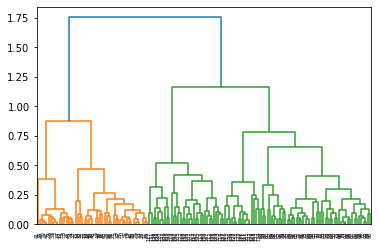

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [ ]:
hc= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [ ]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
y_hc=hc.fit_predict(df_norm)
#clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [ ]:
y_hc

array([1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4])

In [ ]:
data['h_clusterid']=y_hc